# Numerical Computations in Python

Here are the packages that are regularly used by Python users in order to perform numerical computations:

- Numpy

    - It is compiled on C++ and Fortran. Hence, it allows for fast vectorized computations. In some sense, it achieves the efficiency and speed of Matlab.
    

- Scipy

    - Scipy contains modules for linear algebra, optimization, integration, and statistics.
    - The main functionality of Scipy library is built upon Numpy, and its arrays thus make substantial use of NumPy (efficient code).
    - Great documentation.
    
- Sympy
    
    - SymPy is a Python library for symbolic computation.
    - SymPy includes features ranging from basic symbolic arithmetic to calculus, algebra, discrete mathematics and quantum physics. It is capable of formatting the result of the computations as LaTeX code.
    - Similar to Simulink in Matlab.

### Why do we use numerical methods in Economics?


Suppose that the demand for a good is given by:

\begin{equation}Q(p) = 0.5p^{-0.5}+ 0.3 p^{-0.2}\end{equation}

For a given demanded quantity of $Q=1$, what is the price $p$ that clears the market? Let's start by plotting the demand function:

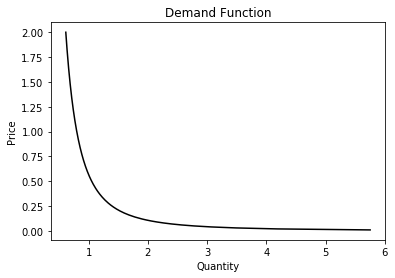

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

p = np.linspace(0.01, 2,200 )
q = 0.5*p**(-0.5)+0.3*p**(-0.2)

plt.figure()
plt.plot(q, p, 'k')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Demand Function')
plt.show()

The demand function seems pretty standard. There is an inverse relationship between price and quantities. And we can clearly see that there a well defined price for a demand equal to 1:

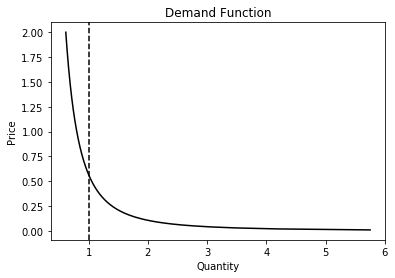

In [3]:
plt.figure()
plt.plot(q, p, 'k')
plt.axvline(x=1,color='k',ls='--')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Demand Function')
plt.show()

The price is the solution to the following equation:

\begin{equation}1 = 0.5p^{-0.5}+ 0.3 p^{-0.2} \quad \quad (1)\end{equation}

If you try to do it with pencil and paper, you won't succeed. This is because there is no algebraic or closed form solution. It is not possible to find the value of $p$ explicitely. Complete Exercise 1 to try and find the solution.

### Exercise 12.1

- Let the excess demand function $g(p):1-0.5p^{-0.5}- 0.3 p^{-0.2}=0$. Plot it. Verify graphically that there is a $p$ such that $g(p)=0$. Define it as a python function and, through trial and error, try to find the solution such that it is correct up to the 3rd decimal.

In [2]:
#Exercise 12.1 answers

-0.000771458724869778

## Root Finding Algorithms

We can be more precise in the way we find the solution to a problem like the one stated in Exercise 1. There are algorithms that work well under some regularity conditions. The best algorithms are the ones supported by a math theorem.

An important application of The Intermediate Value Theorem is often called the Existence of Roots Theorem. Under certain conditions we can guarantee the existence of a root.

> **Theorem**:
    > *Let $f$ be a real valued function, defined and continuous on a bounded closed interval $[a, b]$ of the real line. Assume further that $f (a)f (b) < 0$. Then, there exists at least a $ρ$ in $[a,b]$, such that $f(ρ) = 0$*
    
Notice how the theorem doesn’t say anything about uniqueness. A sufficient condition for the solution to be unique is to further assume that the function is strictly monotonous in the interval $[a, b]$.

### Bisection Algorithm

 The bisection algorithm works as follows:
 
1. Start with the interval $[a_1,b_1]$
 
2. Compute $F(\frac{a_1+b_1}{2})$
     
3. If the sign of $F(\frac{a_1+b_1}{2})$ is the same as of $F(a_1)$, the root must be on the right of $F(\frac{a_1+b_1}{2})$ and now set $a_2= \frac{a_1+b_1}{2}$. If instead the sign of $F(\frac{a_1+b_1}{2})$ is the same as of $F(b_1)$, the root must be on the left of $F(\frac{a_1+b_1}{2})$ and now set instead $b_2 = \frac{a_1+b_1}{2}$

4. Go back to step 2 and repeat to arbitrary precision

<img src="./images/bm.png">


### Exercise 12.2

- Build a bisection function in Python. Then use it to find the price $p$ that clears the demand where $g(p)= 1- 0.5p^{-0.5}-0.3p^{-0.2}$ with tolerance $10^{-15}$.

In [4]:
#Exercise 12.2 answers


### Fixed Point Algorithm

The idea behind fixed point iteration as an algorithm to find the solution to $f (x) = 0$ is to rewrite it as a fixed point problem:

$$ f(x) = 0 \iff x = x-f(x) \iff x = g(x), \quad g(x) = x - f(x) $$


> **Theorem**:
    > *Let $g \in C^1[a,b]:g(x)\in [a,b], \forall x \in [a,b]$. Furthermore, suppose $|f'(x)|\in [0,1)$, $\forall x \in [a,b]$. Then, for any given $x_0\in [a,b]$, the sequence $x^{k+1}= f(x^k)$ converges to the unique fixed point in $[a,b]$.
    
    
The algorithm involves starting with a guess $x_0$ and then iterating using the following rule:

$$x^{k+1} = g(x^k)  \quad \quad (2)$$

### Exercise 12.3

- Define the fixed point algorithm. Then use it to find the price $p$ that clears demand $Q=1$. Use tolerance $10^{-15}$ use maximum number of iterations 1000 and initial guess $x_0=1$. Plot $g(p)$ and the 45 degree line.

In [12]:
#Exercise 12.3 answers
    

---

### Newton-Rhapson Algorithm

The Newton-Rhapson method to find the root of an equation (or a system of equations) is one of the most used in computational economics. The best way to describe the algorithm is to analyze the picture below:

<img src="./images/npic.png">

We start with a guess $x_0$. We compute the equation of the line that is tangent to f at x0 and find the point where it intersects the x-axis. That will be our next point in the iteration:

$$y = a + bx \quad \quad (3) $$


Note that $b = f′(x_1)$. Substituting in (3) and solving w.r.t. $a$ yields:

$$a = f(x_1) − f′(x_1)x_1 \quad \quad (4) $$

We have expressions for $a$ and $b$ hence we have the equation of the tangent:

$$y = f(x_1) − f′(x_1)x_1 + f′(x_1)x \quad \quad (5) $$


The next point in the iteration, i.e., $x_1$ , has coordinates $(x_2 , 0)$. All we need is to
substitute this in (5) and solve w.r.t. $x_2$:

$$x_2 =x_1 − \frac{f(x1)}{f′(x1)}$$




It becomes clear that it is fundamental that the function is differentiable in the search space:

> **Theorem**:
    > *Let $f \in C^1[a,b]:f(x)' \neq 0, \forall x \in [a,b]$. Suppose that $\exists x_n:f(x_n)=0$. Then, for any $x_k \in [a,b]$, the sequence $x^{k+1}= x^k - \frac{f(x^k)}{f'(x^k)}$ converges to $x_n$.
    
    
The algorithm is similar to the fixed point algorithm. Start with an initial guess $x_0$ and then iterate with $g(x^k)$ now taking the particular form $g(x^k) = x^k - \frac{f(x^k)}{f'(x^k)}$

### Exercise 12.4

- First, define the derivative approximation function. This function takes three arguments: 1) a function, 2) $x_0$ and 3) precision $h= x-x_0$. The derivative approximation function is given by: $f'(x_0)= \frac{f(x_0+h)-f(x_0)}{h}$

- Define the Newton-Rhapson algorithm. Then use it to find the price $p$ that clears demand $Q=1$. Use tolerance $10^{-15}$ and let the maximum number of iterations be 1000 and initial guess $x_0=1$. 

In [1]:
#Exercise 12.4 answers



---

## Optimization

- Focus on methods designed to find extreme values of real valued functions with respect to a finite set of variables.

- Arguably the most common class of problems in economics.

- Apart from the grid search method, all other methods are designed to find local extreme values.


In economics, we often want to maximize continuous concave functions over compact and convex domains, which ensures existence and uniqueness.

In these cases, we are sure that an optimum found is indeed global.

One should be well aware of the structure of the problem, to make sure that each method is appropriate and that adequate conclusions can be drawn from the results.

### Grid Search

The name of the method is self-explanatory:

1. Discretize the domain with a grid

2. Evaluate the objective function at each grid point

3. Check which grid point yields the maximum

This method, for the desired precision level along the argument dimension, always yields a global maximum and it does not require any particular property of the objective function, such as continuity or differentiability.

Though the method is easily generalizable for higher dimensions, the computational requirements of grid search grow exponentially with the dimension of the problem - the curse of dimensionality. For a two variable version of the problem above, even assuming two tax rates (two variables bounded in the unit interval) with a desired precision level of $10^{-4}$, would imply evaluating the objective function $(10^4+1)^2$ times. For a similar problem with $n$ variables, we would need a grid of $(10^4+1)^n$ points, a task that quickly becomes unfeasible.

### Exercise 12.5

- Assume that the tax revenue for a government is given by $R(t)= -t^2+t$, where $t$ is the taxe rate. Use the grid search method and find the tax rate on the $[0,1]$ domain that maximizes the tax revenue up to $10^{-4}$. 

In [16]:
#Exercise 12.5 answers


---

### Golden Search

The golden search method to find the maximum of a function doesn't require either the computation of any derivative. For a continuous function over a compact domain, the Weierstrass Theorem assures the existence of at least a maximum. How can we use the golden search algorithm to find it? Let's start by stating the following theorem:

Let $f:X \rightarrow Y, X,Y \subset \mathbb{R}$ be a continuous function over the interval $[a,b], a<b$ and $a,b \in X$. Let $x^l_1,x^h_2 \in [a,b]: x^l_1<x^h_2$. If $f(x^l_1)<f(x^h_1)$ then there is at least a maximum in the interval $[x^l_1,b]$. Conversely, if $f(x^l_1)>f(x^h_1)$ then there exists at least a maximum in the interval $[a,x^h_1]$.

The iterative procedure below assures that a maximum will be found within a non-zero tolerance level in a finite number of iterations. The fact that this algorithm does not rely on differentiability and that it is quite robust, make it quite popular for a number of applications.


<img src="./images/golden.png" alt = "Drawing" style="width: 400px;"/>


The speed with which the algorithm converges to  solution can be improved by setting a rule for the choice of the two interior points in ech iteration. The rule is, at the $k^{th}$ iteration, to choose $x_k^l,x_k^h$ such that:
$$x^l_k=a_k+\frac{3-\sqrt{5}}{2}(b_k-a_k)$$

$$x^h_k=a_k+\frac{\sqrt{5}-1}{2}(b_k-a_k)$$

The fraction in the second equation is known as the golden ratio. 

### Exercise 12.6
- Write a python function that for a given function $f$, an interval $[a,b]$ and a degree of precision $\epsilon$, finds the argmax and maximum of the function $f$.
- Use it to find the maximum of the function $f(x)=x\cos(x^2)$ in the interval $[0,3]$, up to $10^{-10}$ precision.
- Plot $f$ in the interval $[0,3]$.


We found a maximum in Exercise 6 but as we saw, it is not a global one. It is always very important to have very clear in mind what are the assumptions and the conclusions that each algorithm allows us to draw when used.

---

### Newton-Rhapson

Newton-Rhapson methods rely in the notion that finding the maximum of a function can be achieved by finding the root of the first derivative. Let's start with our definition of gradient of real valued functions of $n$ variables:

Let $f:\mathbb{R}^n \rightarrow \mathbb{R}, f \in \mathbb{C}^2$. Then, $ \exists \nabla f:\mathbb{R}^n \rightarrow \mathbb{R}, \nabla f(x)=\left(\frac{\partial f(\textbf{x})}{\partial x_1},...,\frac{\partial f(\textbf{x})}{\partial x_n}\right)$.

Notice that we do not need twice continuous differentiability to be able to define a gradient function, but we will need it in order to implement our gradient-based optimization methods. Before using the gradient method directly to search for the maximum of a function, we will start by solving an optimization problem by finding the root of the first order conditions. Let's look at the below exercise.

Assume an agent lives for two periods, faces the budget constraints and derives utility from consumption as specified below. What is the optimal consumption schedule?

$$\max_{c_1,c_2}U(c_{1},c_{2})=\frac{c_{1}^{1-\mu}}{1-\mu}+\beta \frac{c_{2}^{1-\gamma}}{1-\gamma}$$
subject to:
$$c_{1} =y-s$$

$$c_{2} =y+Rs$$

First lets transform this two dimensional problem into a one variable one, by substituting the constrains into the utility function:

$$ \max_{s} \frac{(y-s)^{1-\mu}}{1-\mu}+ \beta \frac{(y+Rs)^{1-\gamma}}{1-\gamma} $$

We can then write a optimization version of the Newton-Rhapson theorem for root-finding problems:

Let $f\in C^2[a,b]: f''(x) \neq 0, \forall x \in [a,b]$. Suppose that $\exists x_n: f'(x_n)=0$. Then, for any $x_k \in [a,b]$, the sequence $x^{k+1}=x^k-\frac{f'(x^k)}{f''(x^k)}$ converges to $x_n$.


Implementing this leads to a new version of the Netwon-Rhapson function in a previous exercise, but now we just need to write it in a way that it finds the root of the derivative of the provided function.

Assume the following parameters: 

$\mu = 1.1$, 
$\beta = 0.95$, 
$\gamma = 1.2$, 
$R = 1.05$, 
$y = 10$

### Exercise 12.7
- Write a version of the Newton-Rhapson function above that takes as inputs a function $f$ and a guess $x0$ and as output the value of $x$ that maximizes $f$.
- Use this function to solve the above maximization problem in $s$

In [ ]:
#Exercise 12.7 answers

### Solving systems of non-linear equations with gradient based methods

The problem above is simple enough that we can turn it into one equation and one unknown. We then iteratively use the budget constraint in each period to backout consumption in both periods, from optimal savings. However, that is seldom the case. More often then not, you will find yourself having to solve square systems i.e., systems of $n$ equations in $n$ unknowns. In general, the simple consumption-savings problem above, if in an environment with $T$ periods, will imply $T-1$ Euler equations and one consolidated budget constraint.

Consolidate the budget constraints by substituting away s and combine the first order conditions w.r.t. $c_1, c_2$ to get:

$$c_1^{-\mu}-\beta R c_2^{-\gamma} =0$$

$$c_1 + \frac{c_2}{R}-y -\frac{y}{R} =0  $$

This is a system of non-linear equations and can be solved by some of the methods introduced before, now generalized for an arbitrary number of equations. We will use Pythons’s implementation of the Newton-Rhapson algorithm, the function `optimize.root` inside `scipy`. Conceptually, where we before computed successive tangent lines to the function at consecutive points, we will now compute tangent hyper-planes to multi-dimensional surfaces.

The strategy is typically to create a file that takes as inputs a vector of guesses for the solution of each of the $T$ equations in the form of $f(X)=0$, and gives as output, the residual of those equations. This is the format most solvers use.

### Exercise 12.8

- Build a function that returns an array with two elements, i.e. the residuals of the first order conditions for given $c_1, c_2$.

- Use the `optimize.root` to get the optimal allocations, i.e. the ones that make the first order conditions zero.

In [1]:
#Ex 12.8 answers

[- More info at Scipy Optimize Documentation](https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/optimize.html)

---

### Constrained Optimization
To solve the previous exercises, we substituted the constraints into the objective function or in the first order conditions of the problem. In this way, we avoided dealing with them explicitely. However, we were allowed to do it because the constraints are satisfied with equality. In general that may not be the case. An example often used is when we want to create an environment where agents are not allowed to borrow. In this case we want to add the constraint that asset holdings cannot be negative, an inequality constraint. Remember also that for the budget constraint, we claim it holds with equality based on a non-satiation argument i.e. that the marginal utility is strictly positive. Again, that may not always be the case.

In this section we will introduce two methods of dealing with inequality constraints. The first one is based on the Karush-Kuhn-Tucker theorem. The second will  make use of a penalty function.

### Karush-Kuhn-Tucker
As said before when using the Lagrange formulation, we assume interior solutions in the sense that the constraints are satisfied with equality. Let's restate the previous savings problem, but now imposing a no-borrowing constraint:

$$\max_{c_1,c_2}U(c_{1},c_{2}) =\frac{c_{1}^{1-\mu }}{1-\mu }+\beta \frac{c_{2}^{1-\gamma }}{1-\gamma }$$
subject to:
$$c_{1} =y-s$$
$$c_{2} =y+Rs$$
$$s \geq 0 $$

We can no longer substitute away $s$ because of the inequality. Let's build the Lagrange function:

$$\mathcal{L}=\frac{c_{1}^{1-\mu }}{1-\mu}+\beta \frac{c_{2}^{1-\gamma }}{1-\gamma }+\lambda_1(y-s-c_1)+\lambda_2(y+Rs-c_2)+\lambda_3s $$

The first order conditions w.r.t. $c_1, c_2, s, \lambda_1, \lambda_2$ and $\lambda_3$ respectively are:

$$c_1^{-\mu}-\lambda_1 =0$$

$$\beta c_2^{-\gamma}-\lambda_2 = 0$$

$$-\lambda_1+R\lambda_2+\lambda_3 = 0$$

$$y-s-c_1 =0$$

$$y+Rs-c_2 = 0 $$

$$\lambda_3s =0 $$


The system is determinate, we have 6 equations in six unknowns. The issue is to look for the solution such that $\lambda_3 \geq 0$ if $s\leq0$ so that the no borrowing constraint holds. Notice that now the previous version of the Euler equation will not hold with equality in general. The agent will no longer be able to smooth consumption if he is liquidity constrained. To see this, notice that the system above is equivalent to:

$$c_1^{-\mu}-R\beta c_2^{-\gamma}+\lambda_3 =0$$
$$y-s-c_1 =0$$
$$y+Rs-c_2 = 0$$
$$\lambda_3s =0 $$


Notice how if $\lambda_3 >0$, the last condition implies that the agent is liquidity constrained i.e. $s=0$ and that no longer $c_1^{-\mu}=R\beta c_2^{-\gamma}$ as before.

We can use a modified version of the auxiliary function we built for Exercise 8, to solve this.

The way to introduce a multiplier that must be equal or greater than zero is by making use of the $\max(0,\lambda_3)$ term. Notice that if the agent is liquidity constrained, then $c_1^{-\mu}<R\beta c_2^{-\gamma}$ and consequently $\lambda_3>0$ and $s=0$. This means that $\max(0,\lambda_3)>0$ and that $\max(0,-\lambda_3)=0$ implies $s = 0$, by the sixth equation in the `auxg2`function.

### Exercise 12.9
- Use the `optimize.root` function from numpy to  find the solution to the above problem.

In [ ]:
#Exercise 12.9 answers

### The Penalty Function method
As the name suggests, this method involves the specification of a penalty function. We will use this with hill-climbing algorithms by redefining the objective function in order to penalize solutions that are outside our constrained choice set, such that they will never be optimal. Let's restate the original consumption-savings problem as:

$$\max_{s}U(y-s,y+Rs) =\frac{(y-s)^{1-\mu }}{1-\mu }+\beta \frac{(y+Rs)^{1-\gamma }}{1-\gamma } + 1000\max(0,-s)$$

It is clear how choosing negative savings is never optimal in this context. This leads us to the next exercise.

### Exercise 12.10
- Create a python function with the expression above and then use one maximization procedure of your choice to find the constrained maximum.